In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df_raw = pd.read_csv('raw_2.csv')
df = pd.read_csv('train_2.csv')

# Airline Industry in 2020

>The worst year of the airline Industry, Covid-19 gave massive impact to every Airline Industry, They have to survive with this condition untill we find the best solution and recover as soon as possible, especially we are trying to finding and waiting for testing of the vaccine from this virus.

Several Airlines Industry have to commit that they cant survive, ask for bankruptcy protection. They have to layoff their employees because of financial problem. 
Several Airlines cant continue their bussines, they declared bankruptcy.


This is the biggest airline disaster since 1984 (based on this dataset from australian domestic airline), The passenger dropped too far from the trend and destroyed  all prediction model. Let we see the trend below. 

In [2]:
trend = ((df_raw[['Year','RPKs']].groupby(['Year']).mean())*100).round(2)

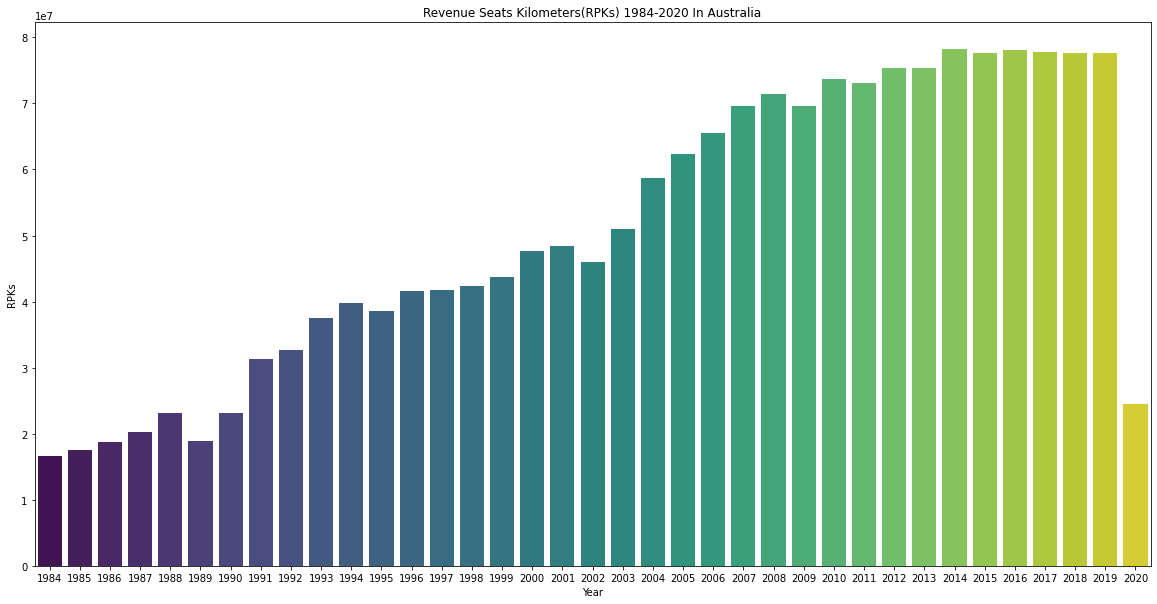

In [3]:
plt.figure(figsize = (20, 10))
plt.title('Revenue Seats Kilometers(RPKs) 1984-2020 In Australia')
ax = sns.barplot(x="Year", y="RPKs", data=df_raw,
                 palette="viridis", ci =False)

We could see that Corona Virus Disease 19 (Covid-19) in **2020** Obviously create a massive impact for RPKs this year and had beaten the airline Indsutry all around the world.

**Airline Bussines** is dinamic bussines, they really depends on the passenger each day, Month, and Year. By the time ,the airline industry getting bigger and bigger, as we could see above , since 1984-2019, RPKs (Revenue Seats Kilometers) in **Australia** grows very quickly and becomes a promising and highly competitive bussiness. Despite of this, the airline bussines was destroyed because of this pandemic, people should be stayed at home to stop the spread of the virus, many Country take an action to did a **Lockdown**, All the airport decided to close flight for the safety reason, in the end of **third month** 2020, this pandemic getting bigger and couldn't be prevented, **Cargo Aircraft** is the only airplane which could fly in a spesific Country. Every country trying to save their Airline Company, they have to change bussines concept and try to save thier money  as much as possible. Several Airline decided to grounded their Aircraft and the other trying hard to survive in this hard situation by change their aircraft configuration from the **Passenger aircraft** to **cargo aircraft**, but it is not an easy way to change that ! They have to spend 2.5 to 3 million USD.

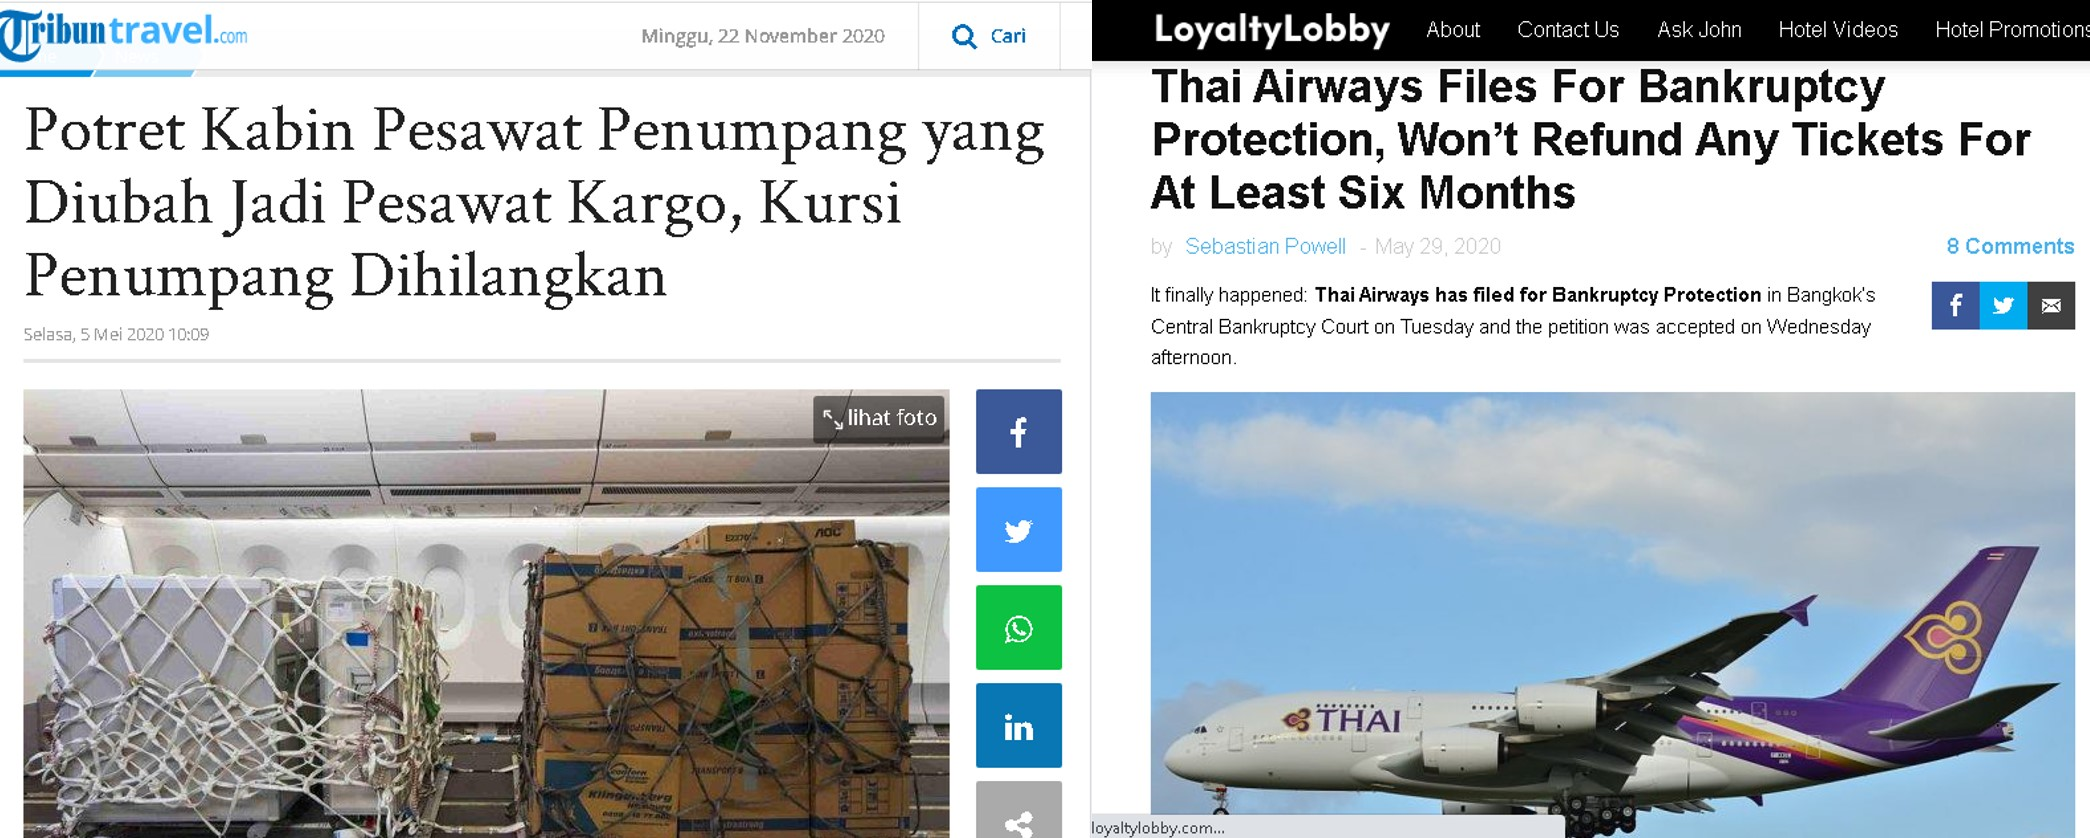

In [4]:
Image("cargo_ac.jpg")

Source

https://travel.tribunnews.com/2020/05/05/potret-kabin-pesawat-penumpang-yang-diubah-jadi-pesawat-kargo-kursi-penumpang-dihilangkan?page=2

https://loyaltylobby.com/2020/05/29/thai-airways-files-for-bankruptcy-protection-wont-refund-any-tickets-for-at-least-six-months/

https://www.flightglobal.com/airframers/current-generation-aircraft-ready-for-cargo-conversions/138863.article

# Background of This Project

>Because of this **anomaly year**, The Airline Company couldn't use the historical data to predict their passengers to calculate their revenue, their fare, and how to calculate the **ticket price** from this obscurity. So they have to think more than before, I think we still could predict by we take the flight traffic data as much as possible in this year. But the problem is , We couldn't **predict** the traffic in future, we still in the **anomaly year**, many country make their own policy to keep their citizens safe, just like in **Australia**, several region make **territorial quarentine** to avoid the spread of the virus, so I think its **useless** to predict the demand of the passenger in the future and nearly the end of this year, We are still waiting for uncertainly about the safety and healty from this virus.

The most likely thing that We could do is to reduce the **Operational of the Aircraft** as efficient as possible, we have to find the **new pattern** from this hardest year ever.

# Goals

In this project, We would like to predict on the next month, how many flight could be possible in a **spesific route** based on **load factor** the month before or the average **load factor** this year, with the limitation of available seat (On several Airline) because of the safety reason (Social Distancing) to reduce the spread of the virus and the most important think is to restore the **customers trust** to fly again over the region of Australia or maybe over the country.

# About the Data

The Australian Government Released their Domestic Airlines Dataset which from 1985 untill Month 8 2020 

Link Resources : https://data.gov.au/data/dataset/domestic-airlines-top-routes-and-totals

Description of Dataset  : https://data.gov.au/data/dataset/domestic-airlines-top-routes-and-totals/resource/982da3ca-1424-4c9c-9f13-73987e408861



In [5]:
df_raw.head()

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num
0,ADELAIDE,ALICE SPRINGS,30682,15743,143,81.8,1316,20717788.0,25327369.0,19246,1984,1
1,ADELAIDE,BRISBANE,30682,3781,32,89.8,1622,6132782.0,6829379.0,4210,1984,1
2,ADELAIDE,CANBERRA,30682,1339,12,94.7,972,1301508.0,1374348.0,1414,1984,1
3,ADELAIDE,DARWIN,30682,3050,33,66.8,2619,7987950.0,11958009.0,4566,1984,1
4,ADELAIDE,GOLD COAST,30682,1596,16,88.5,1607,2564772.0,2898047.0,1803,1984,1


Definitions:

**City-Pair** - The ports shown make up the city-pair route. Passenger movements shown for a city pair reflect total traffic in both directions.

**Month** - Total Days which has been continue to added up in each month and year, every new month will added by total days in spesific Month (Example : Total days in February is 29 will be added with total Month before)

**Passenger Trips** - The number of Passenger , calculated by divided the number of RPKs on each Month, by the distance in kilometres between the ports. The distances used are Great Circle Distances.

**Aircraft Trips** - The number of flight stages. A return flight counts as two aircraft trips. (frequency of flights in a month)

**Distance** - Great Circle Distances between two airports.

**Passenger Load Factor** - The total revenue passenger kilometres performed as a percentage of the total available seat kilometres.

**Revenue Passenger Kilometres (RPKs)** - Calculated by multiplying the number of revenue passengers travelling on each flight stage, by the distance in kilometres between the ports. The distances used are Great Circle Distances.

**Available Seats Kilometres (ASKs)** - Calculted by multiplying the number of Available Seats on each flight stage, by the distance in kilometres between the ports. THe distances used are Great Circle Distances.




## Information about Dataset :

Dataset have 24088 total **rows** and 12 total **Columns**

In [6]:
print(df_raw.info())
print(df_raw.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24228 entries, 0 to 24227
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City1                  24228 non-null  object 
 1   City2                  24228 non-null  object 
 2   Month                  24228 non-null  int64  
 3   Passenger_Trips        24228 non-null  int64  
 4   Aircraft_Trips         24228 non-null  int64  
 5   Passenger_Load_Factor  24228 non-null  object 
 6   Distance_GC_(km)       24228 non-null  int64  
 7   RPKs                   24226 non-null  float64
 8   ASKs                   24226 non-null  float64
 9   Seats                  24228 non-null  int64  
 10  Year                   24228 non-null  int64  
 11  Month_num              24228 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 2.2+ MB
None
(24228, 12)


## Change Passenger_Load Factor Type

Bacause of Passenger_Load_Factor type is object we have to change the type to float, I cant change directly Passenger_load_factor to float , so we have to create new column with new name **load_factor**

In [7]:
df_raw['load_factor'] = ((df_raw['Passenger_Trips']/df_raw['Seats'])*100).round(2)

In [8]:
display(df_raw[df_raw['load_factor'].isnull()])

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor
56,BRISBANE,MACKAY,30713,0,1,0,797,0.0,0.0,0,1984,2,NaN
565,BRISBANE,MACKAY,31079,0,9,0,797,0.0,0.0,0,1985,2,NaN
877,CAIRNS,MELBOURNE,31291,0,1,0,2311,0.0,0.0,0,1985,9,NaN
1153,MELBOURNE,NEWCASTLE,31472,0,1,0,836,0.0,0.0,0,1986,3,NaN
1638,MELBOURNE,NEWCASTLE,31809,0,1,0,836,0.0,0.0,0,1987,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24152,SYDNEY,TOWNSVILLE,44075,0,0,0,1690,0.0,0.0,0,2020,9,NaN
24224,SYDNEY,WAGGA WAGGA,43983,0,0,0,367,0.0,0.0,0,2020,6,NaN
24225,SYDNEY,WAGGA WAGGA,44013,0,0,0,367,0.0,0.0,0,2020,7,NaN
24226,SYDNEY,WAGGA WAGGA,44044,0,0,0,367,0.0,0.0,0,2020,8,NaN


In [9]:
df_raw.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [10]:
df_raw['load_factor'].fillna(value=0,inplace=True)

In [11]:
display(df_raw[df_raw["load_factor"].isnull()])

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor


delete **Passenger_Load_Factor** columns

In [12]:
del df_raw['Passenger_Load_Factor']

In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24228 entries, 0 to 24227
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City1             24228 non-null  object 
 1   City2             24228 non-null  object 
 2   Month             24228 non-null  int64  
 3   Passenger_Trips   24228 non-null  int64  
 4   Aircraft_Trips    24228 non-null  int64  
 5   Distance_GC_(km)  24228 non-null  int64  
 6   RPKs              24226 non-null  float64
 7   ASKs              24226 non-null  float64
 8   Seats             24228 non-null  int64  
 9   Year              24228 non-null  int64  
 10  Month_num         24228 non-null  int64  
 11  load_factor       24228 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 2.2+ MB


## Missing Value

In [14]:
df_raw.isna().sum()

City1               0
City2               0
Month               0
Passenger_Trips     0
Aircraft_Trips      0
Distance_GC_(km)    0
RPKs                2
ASKs                2
Seats               0
Year                0
Month_num           0
load_factor         0
dtype: int64

## Full information about Dataset

In [15]:
satisfactionDesc = []

for i in df_raw.columns:
    satisfactionDesc.append([
        i,
        df_raw[i].dtypes,
        df_raw[i].isna().sum(),
        (((df_raw[i]).isna().sum())/len(df)*100).round(2),
        df_raw[i].nunique(),
        df_raw[i].drop_duplicates().sample().values
    ])

pd.DataFrame(data = satisfactionDesc, columns = [
    'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'Unique',
    'Unique Sample'
])

,Data Feature,Data Types,Null,Null Pct,Unique,Unique Sample
0,City1,object,0,0.00,30,[NEWCASTLE]
1,City2,object,0,0.00,27,[HAMILTON ISLAND]
2,Month,int64,0,0.00,441,[37104]
3,Passenger_Trips,int64,0,0.00,19332,[32167]
4,Aircraft_Trips,int64,0,0.00,2387,[3912]
5,Distance_GC_(km),int64,0,0.00,77,[972]
6,RPKs,float64,2,0.46,22628,[85428560.0]
7,ASKs,float64,2,0.46,22613,[245024865.0]
8,Seats,int64,0,0.00,19789,[61767]
9,Year,int64,0,0.00,37,[2012]


## Describing the Data

This is describe about the distribution about data where :

**Count** - total of data in each columns

**Mean** - The average value from each columns

**std** - Standard deviation from each columns

**min** - minimum value from each columns

**25%** - Q1

**50%** - Median

**75%** - Q3

**max** - maximum value from each columns

In [16]:
df_raw.describe()

,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor
count,24228.000000,24228.000000,24228.000000,24228.000000,2.422600e+04,2.422600e+04,24228.000000,24228.000000,24228.000000,24228.000000
mean,38011.351205,47676.396112,467.506398,1215.480890,5.373255e+07,6.886138e+07,62160.070291,2003.610905,6.479858,68.965038
std,3849.579421,84497.491029,602.879125,845.665706,8.965854e+07,1.109568e+08,105620.138064,10.541114,3.437891,19.805351
min,30682.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1984.000000,1.000000,0.000000
25%,34851.000000,8728.000000,125.000000,538.000000,5.084154e+06,7.317508e+06,12895.500000,1995.000000,4.000000,64.690000
50%,38292.000000,17449.500000,311.000000,956.000000,1.791685e+07,2.531682e+07,24899.000000,2004.000000,6.000000,73.570000
75%,41395.000000,52072.750000,549.000000,1622.000000,5.507185e+07,7.219966e+07,69258.500000,2013.000000,9.000000,80.500000
max,44075.000000,834347.000000,5397.000000,3615.000000,5.915870e+08,7.059521e+08,959123.000000,2020.000000,12.000000,109.720000


## Checking the Outliers

There is to many outliers in this dataset,
based on my **Goals** I will take this data just in year **2020**
> We couldnt take all the data because of the **force majeure in 2020** many country have to limit their flight for safety reason and makes 2020 traffic dropped to deep from this dataset.

This boxplot below show the **outliers** from this dataset before we take the data just in year **2020** .

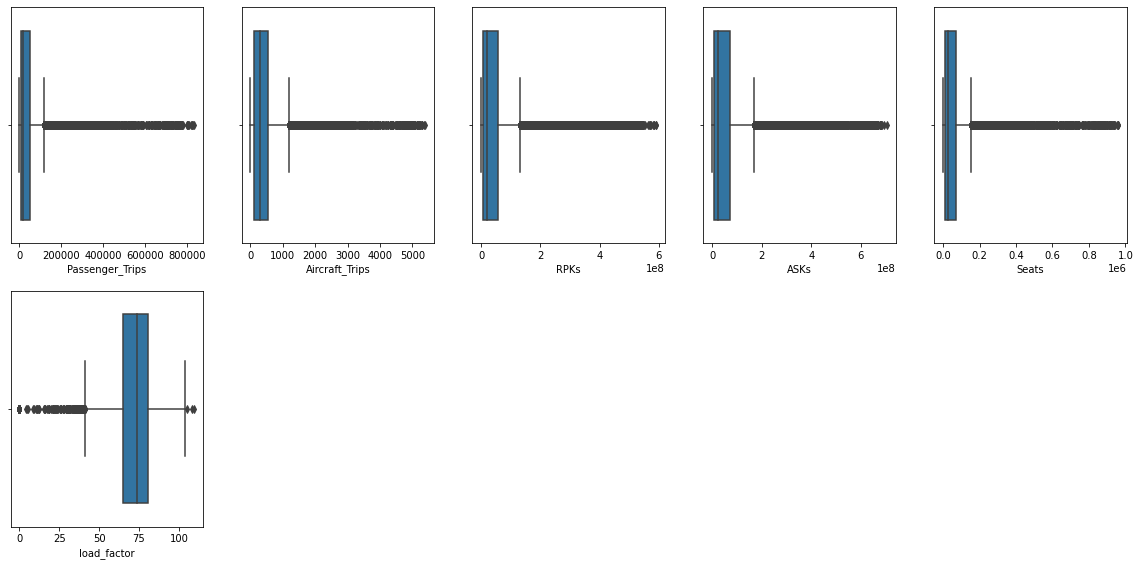

In [17]:
df_describe = df_raw.drop(columns = ['City1', 'City2', 'Month','Distance_GC_(km)', 'Year','Month_num'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

### 2020 Dataset

We still see there is too many outliers based on bloxplot below, so I will try to handle with limiting the **Passanger trips**

In [18]:
df_20 = df_raw[df_raw['Year']==2020]

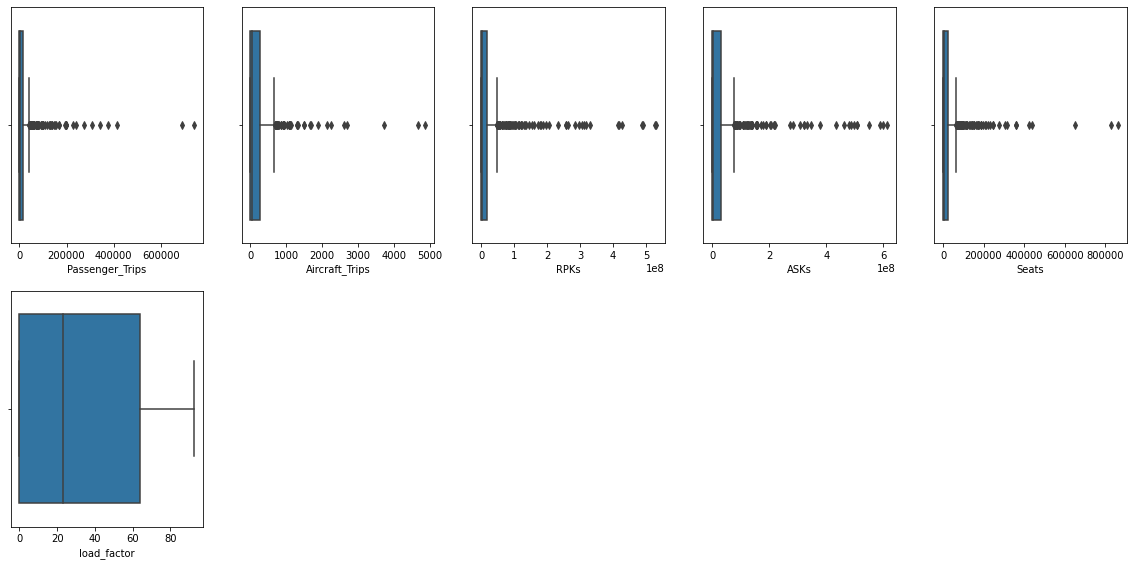

In [19]:
df_describe = df_20.drop(columns = ['City1', 'City2', 'Month','Distance_GC_(km)', 'Year','Month_num'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

### Handling Missing Value RPks and ASKs

In [20]:
display(df_20[df_20['RPKs'].isnull()])

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor
22285,DARWIN,SYDNEY,44044,0,0,3155,NaN,NaN,0,2020,8,0.0
22286,DARWIN,SYDNEY,44075,0,0,3155,NaN,NaN,0,2020,9,0.0


In [21]:
df_20['RPKs'].fillna(value=0,inplace=True)

In [22]:
df_raw['ASKs'].fillna(value=0,inplace=True)

In [23]:
display(df_20[df_20['RPKs'].isnull()])

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor


### Add New Column (City Pair)

So We would to add New Column Called City_Pair For **One Hot Encoding** Purpose

In [24]:
df_20['city_pair']=df_20['City1']+df_20['City2']

In [25]:
df_20

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor,city_pair
19155,ALBURY,SYDNEY,43831,12665,323,452,5724580.0,8372396.0,18523,2020,1,68.37,ALBURYSYDNEY
19156,ALBURY,SYDNEY,43862,15546,459,452,7026792.0,10958740.0,24245,2020,2,64.12,ALBURYSYDNEY
19157,ALBURY,SYDNEY,43891,12140,435,452,5487280.0,10427188.0,23069,2020,3,52.62,ALBURYSYDNEY
19158,ALBURY,SYDNEY,43922,314,41,452,141928.0,877784.0,1942,2020,4,16.17,ALBURYSYDNEY
19159,ALBURY,SYDNEY,43952,416,33,452,188032.0,793712.0,1756,2020,5,23.69,ALBURYSYDNEY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24223,SYDNEY,WAGGA WAGGA,43952,549,37,367,201483.0,723724.0,1972,2020,5,27.84,SYDNEYWAGGA WAGGA
24224,SYDNEY,WAGGA WAGGA,43983,0,0,367,0.0,0.0,0,2020,6,0.00,SYDNEYWAGGA WAGGA
24225,SYDNEY,WAGGA WAGGA,44013,0,0,367,0.0,0.0,0,2020,7,0.00,SYDNEYWAGGA WAGGA
24226,SYDNEY,WAGGA WAGGA,44044,0,0,367,0.0,0.0,0,2020,8,0.00,SYDNEYWAGGA WAGGA


### Add New Column (Average Available Seat Per Flight)

The Function of this column is to find the **average Available Seat** from each Airline provide per Flight

In [26]:
df_20['avg_ac_capacity'] = (df_20['Seats']/df_20['Aircraft_Trips']).round(0)

In [27]:
df_20.head()

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor,city_pair,avg_ac_capacity
19155,ALBURY,SYDNEY,43831,12665,323,452,5724580.0,8372396.0,18523,2020,1,68.37,ALBURYSYDNEY,57.0
19156,ALBURY,SYDNEY,43862,15546,459,452,7026792.0,10958740.0,24245,2020,2,64.12,ALBURYSYDNEY,53.0
19157,ALBURY,SYDNEY,43891,12140,435,452,5487280.0,10427188.0,23069,2020,3,52.62,ALBURYSYDNEY,53.0
19158,ALBURY,SYDNEY,43922,314,41,452,141928.0,877784.0,1942,2020,4,16.17,ALBURYSYDNEY,47.0
19159,ALBURY,SYDNEY,43952,416,33,452,188032.0,793712.0,1756,2020,5,23.69,ALBURYSYDNEY,53.0


We could see below because of Seats from several **city pair** is 0 and the **Aircraft Trips** is 0 , so the result is **avg_ac_capacity** have a NaN value

So we have to put **0** value because there is no Seats available in several city pair at a spesific **Month**

In [28]:
display(df_20[df_20['avg_ac_capacity'].isna()])

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor,city_pair,avg_ac_capacity
19160,ALBURY,SYDNEY,43983,0,0,452,0.0,0.0,0,2020,6,0.0,ALBURYSYDNEY,NaN
19161,ALBURY,SYDNEY,44013,0,0,452,0.0,0.0,0,2020,7,0.0,ALBURYSYDNEY,NaN
19162,ALBURY,SYDNEY,44044,0,0,452,0.0,0.0,0,2020,8,0.0,ALBURYSYDNEY,NaN
19163,ALBURY,SYDNEY,44075,0,0,452,0.0,0.0,0,2020,9,0.0,ALBURYSYDNEY,NaN
19225,ADELAIDE,ALICE SPRINGS,43922,0,0,1316,0.0,0.0,0,2020,4,0.0,ADELAIDEALICE SPRINGS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24152,SYDNEY,TOWNSVILLE,44075,0,0,1690,0.0,0.0,0,2020,9,0.0,SYDNEYTOWNSVILLE,NaN
24224,SYDNEY,WAGGA WAGGA,43983,0,0,367,0.0,0.0,0,2020,6,0.0,SYDNEYWAGGA WAGGA,NaN
24225,SYDNEY,WAGGA WAGGA,44013,0,0,367,0.0,0.0,0,2020,7,0.0,SYDNEYWAGGA WAGGA,NaN
24226,SYDNEY,WAGGA WAGGA,44044,0,0,367,0.0,0.0,0,2020,8,0.0,SYDNEYWAGGA WAGGA,NaN


In [29]:
df_20['avg_ac_capacity'].fillna(value=0,inplace=True)

In [30]:
display(df_20[df_20['avg_ac_capacity'].isna()])

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor,city_pair,avg_ac_capacity


### Add New Column Flight Duration 

This column contain the **flight duration** in Hour unit, the reason why we have to add this column because we would to calculate the **Total Operational Cost** for each Flight from the origin City (City1) to the destination City (City2)

Source : Google Flight - Checking every single route flight duration, mostly We choose Direct Flight and Qantas Airlines.

In [31]:
df_20['flight_duration']=df_20['city_pair'].map({
    'ALBURYSYDNEY':1.25,
    'ADELAIDEALICE SPRINGS':2,
    'ADELAIDECANBERRA':1.5,
    'ADELAIDEMELBOURNE':1.25,
    'ADELAIDEGOLD COAST':2.25,
    'ADELAIDEPERTH':3.25,
    'ADELAIDEPORT LINCOLN':0.92,
    'ADELAIDESYDNEY':1.92,
    'ARMIDALESYDNEY':1.42,
    'ADELAIDEBRISBANE':2.33,
    'ALICE SPRINGSDARWIN':2,
    'ALICE SPRINGSMELBOURNE':4,
    'ALICE SPRINGSSYDNEY':2.75,
    'AYERS ROCKSYDNEY':3,
    'BUNDABERGBRISBANE':1,
    'BROOMEPERTH':2.5,
    'BRISBANECANBERRA':1.83,
    'BRISBANECAIRNS':2.25,
    'BRISBANEDARWIN':3.92,
    'BRISBANEEMERALD':1.58,
    'BRISBANEGLADSTONE':1.17,
    'BRISBANEHOBART':4,
    'BRISBANEHAMILTON ISLAND':1.5,
    'BRISBANEMOUNT ISA':1.58,
    'BRISBANEMELBOURNE':5.1,
    'BRISBANEMACKAY':1.5,
    'BRISBANEMORANBAH':1.7,
    'BRISBANENEWCASTLE':1.5,
    'BRISBANEPERTH':5.17,
    'BRISBANEPROSERPINE':1.58,
    'BRISBANEROCKHAMPTON':1.17,
    'BRISBANESYDNEY':1.42,
    'BRISBANETOWNSVILLE':1.83,
    'CANBERRAMELBOURNE':1.1,
    'CANBERRASYDNEY':0.92,
    'COFFS HARBOURSYDNEY':1.33,
    'CAIRNSMELBOURNE':4.92,
    'CAIRNSTOWNSVILLE':0.92,
    'CAIRNSSYDNEY':4.1,
    'DUBBOSYDNEY':1.33,
    'DARWINMELBOURNE':6.67,
    'DARWINPERTH':8.82,
    'DARWINSYDNEY':4.33,
    'GERALDTONPERTH':0.92,
    'HOBARTMELBOURNE':1.25,
    'HOBARTSYDNEY':1.92,
    'HAMILTON ISLANDMELBOURNE':4.33,
    'HAMILTON ISLANDSYDNEY':2.33,
    'KALGOORLIEPERTH':1.17,
    'KARRATHAPERTH':1.92,
    'LAUNCESTONMELBOURNE':1.25,
    'LAUNCESTONSYDNEY':1.58,
    'SUNSHINE COASTMELBOURNE':4.17,
    'SUNSHINE COASTSYDNEY':1.42,
    'MELBOURNEMILDURA':1.33,
    'MELBOURNENEWCASTLE':1.17,
    'MELBOURNEGOLD COAST':3.75,
    'MELBOURNEPERTH':3.92,
    'MELBOURNESYDNEY':1.33,
    'MELBOURNETOWNSVILLE':5.17,
    'GOLD COASTSYDNEY':1.42,
    'PERTHPORT HEDLAND':2,
    'PERTHSYDNEY':4,
    'PERTHNEWMAN':1.67,
    'PROSERPINESYDNEY':1.33,
    'PORT MACQUARIESYDNEY':1.17,
    'BALLINASYDNEY':1.75,
    'SYDNEYTAMWORTH':1,
    'SYDNEYTOWNSVILLE':4.42,
    'SYDNEYWAGGA WAGGA':1.17
})

In [32]:
## Cheking to ensure there no city pair left empty 

display(df_20[df_20['avg_ac_capacity'].isna()])

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor,city_pair,avg_ac_capacity,flight_duration


### Add New Column TOC per Block Time

> This feature contain the average of **Total Operational** Cost per Hour from US airline in **USD** to make an assumption the TOC in spesific route in Australia because of the limitation of the data.

Each flight use the different type of aircraft and **Total Operational Cost(TOC)** also different from the other type of the Aircraft. We add this column for calculate the Total Operational Cost in A Spesific Route in Australia, next column will be explain more detail about corralation **Flight Duration** and **TOC per Block Time**

Source : 

https://www.planestats.com/bhsw_2014sep

https://www.aircraftcostcalculator.com/AircraftOperatingCosts/483/Bombardier+Dash+8-Q300#:~:text=Based%20on%20450%20annual%20owner,down%20to%20%243%2C054.13%20per%20hour.

In [33]:
df_20['TOC_blocktime']=df_20['city_pair'].map({
    'ALBURYSYDNEY':3054.13,                             #bombardier
    'ADELAIDEALICE SPRINGS':4092.17,                    #b737-800
    'ADELAIDECANBERRA':4092.17,                         #b737-800
    'ADELAIDEMELBOURNE':4092.17,                        #b737-800
    'ADELAIDEGOLD COAST':3997.25,                       #a320
    'ADELAIDEPERTH':4092.17,                            #737-800
    'ADELAIDEPORT LINCOLN':3054.13,                     #bombardier
    'ADELAIDESYDNEY':4092.17,                           #737-800
    'ARMIDALESYDNEY':3054.13,                           #bombardier
    'ADELAIDEBRISBANE':4092.17,                         #737-800
    'ALICE SPRINGSDARWIN':4092.17,                      #737-800
    'ALICE SPRINGSMELBOURNE':4092.17,                   #737-800
    'ALICE SPRINGSSYDNEY':4092.17,                      #737-800
    'AYERS ROCKSYDNEY':3997.25,                         #a320
    'BUNDABERGBRISBANE':3054.13,                        #bombardier
    'BROOMEPERTH':6611.53,                              #fokker 100
    'BRISBANECANBERRA':4092.17,                         #737-800
    'BRISBANECAIRNS':4092.17,                           #737-800
    'BRISBANEDARWIN':4092.17,                           #737-800
    'BRISBANEEMERALD':3054.13,                          #bombardier
    'BRISBANEGLADSTONE':3054.13,                        #bombardier
    'BRISBANEHOBART':4092.17,                           #737-800
    'BRISBANEHAMILTON ISLAND':4092.17,                  # 737-800 
    'BRISBANEMOUNT ISA':4092.17,                        # 737-800 
    'BRISBANEMELBOURNE':4092.17,                        # 737-800     
    'BRISBANEMACKAY':4092.17,                           # 737-800     
    'BRISBANEMORANBAH':3054.13,                         # bombardier
    'BRISBANENEWCASTLE':4092.17,                        # 737-800     
    'BRISBANEPERTH':4092.17,                            # 737-800  
    'BRISBANEPROSERPINE':3997.25,                       # a320
    'BRISBANEROCKHAMPTON':3054.13,                      # bombardier
    'BRISBANESYDNEY':4092.17,                           # 737-800
    'BRISBANETOWNSVILLE':4092.17,                       # 737-800
    'CANBERRAMELBOURNE':3054.13,                        # bombardier
    'CANBERRASYDNEY':3054.13,                           # bombardier
    'COFFS HARBOURSYDNEY':3054.13,                      #bombardier
    'CAIRNSMELBOURNE':4092.17,                          # 737-800
    'CAIRNSTOWNSVILLE':3054.13,                         # bombardier
    'CAIRNSSYDNEY':3997.25,                             # a320
    'DUBBOSYDNEY':3054.13,                              #bombardier
    'DARWINMELBOURNE':4092.17,                          # 737-800
    'DARWINPERTH':4092.17,                              # 737-800
    'DARWINSYDNEY':4092.17,                             # 737-800
    'GERALDTONPERTH':6611.53,                           #fokker 100
    'HOBARTMELBOURNE':4092.17,                          # 737-800
    'HOBARTSYDNEY':4092.17,                             # 737-800
    'HAMILTON ISLANDMELBOURNE':4092.17,                 # 737-800
    'HAMILTON ISLANDSYDNEY':4092.17,                    # 737-800
    'KALGOORLIEPERTH':3997.25,                          # a320  
    'KARRATHAPERTH':4092.17,                            # 737-800
    'LAUNCESTONMELBOURNE':3054.13,                      #bombardier
    'LAUNCESTONSYDNEY':4092.17,                         # 737-800
    'SUNSHINE COASTMELBOURNE':3997.25,                  # a320 
    'SUNSHINE COASTSYDNEY':3997.25,                     # a320
    'MELBOURNEMILDURA':3054.13,                         #bombardier
    'MELBOURNENEWCASTLE':4092.17,                       # 737-800
    'MELBOURNEGOLD COAST':3997.25,                      # a320
    'MELBOURNEPERTH':8890,                              #a330
    'MELBOURNESYDNEY':4092.17,                          # 737-800
    'MELBOURNETOWNSVILLE':3997.25,                      # a320
    'GOLD COASTSYDNEY':3997.25,                         # a320
    'PERTHPORT HEDLAND':4092.17,                        # 737-800
    'PERTHSYDNEY':8890,                                 #a330
    'PERTHNEWMAN':3997.25,                              # a320
    'PROSERPINESYDNEY':3997.25,                         # a320
    'PORT MACQUARIESYDNEY':3054.13,                     #bombardier
    'BALLINASYDNEY':3054.13,                            #bombardier
    'SYDNEYTAMWORTH':3054.13,                           #bombardier
    'SYDNEYTOWNSVILLE':4092.17,                         # 737-800
    'SYDNEYWAGGA WAGGA':3054.13,                        #bombardier
})

In [34]:
## Cheking to ensure there no city pair left empty 

display(df_20[df_20['avg_ac_capacity'].isna()])

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor,city_pair,avg_ac_capacity,flight_duration,TOC_blocktime


### Add New Column Total Operational Cost(TOC) Per Flight

This Column contain value of **total operatonal** cost every flight based on which aircraft would be used in a specific Route.

>example : Flight **Albury Sydney** used **BOMBARDIER Dash 8-Q300** with average operating cost : **3045.13 USD** per block time, 
Flight Duration of **Albury-Sydney** is **1.25 Hour**, TOC per flight in this route : **3817.66 USD**

In [35]:
df_20['TOC_route'] = ((df_20['TOC_blocktime'])*(df_20['flight_duration'])).round(2)

In [36]:
## Cheking to ensure there no city pair left empty 

display(df_20[df_20['avg_ac_capacity'].isna()])

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor,city_pair,avg_ac_capacity,flight_duration,TOC_blocktime,TOC_route


### Add New Column Total Days in Spesific Month
This column contain the total days in spesific column 
>Example : In january have 31 total days.

The purpose of adding this Column is to calculate the Average Aircraft Trips each Day.

In [37]:
conditions = [
    (df_20['Month_num']==1),
    (df_20['Month_num']==3),
    (df_20['Month_num']==5),
    (df_20['Month_num']==7),
    (df_20['Month_num']==8),
    (df_20['Month_num']==10),
    (df_20['Month_num']==12),
    (df_20['Month_num']==4),
    (df_20['Month_num']==6),
    (df_20['Month_num']==9),
    (df_20['Month_num']==11),
    (df_20['Month_num']==2)
    ]

values = [31,31,31,31,31,31,31,30,30,30,30,29]

df_20['total_day'] = np.select(conditions, values)

In [38]:
## Cheking to ensure there no city pair left empty 

display(df_20[df_20['total_day'].isna()])

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor,city_pair,avg_ac_capacity,flight_duration,TOC_blocktime,TOC_route,total_day


### Add New Column Average Aircraft Trips for each Day

This Column is to calculate the Average **Total Operating Cost** for each **City Pair** with a spesific Aircraft types

In [39]:
df_20['daily_ac_trips'] = (df_20['Aircraft_Trips']/df_20['total_day']).round(2)

In [40]:
## Cheking to ensure there no city pair left empty 

display(df_20[df_20['total_day'].isna()])

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor,city_pair,avg_ac_capacity,flight_duration,TOC_blocktime,TOC_route,total_day,daily_ac_trips


### Add New Column Estimation daily TOC

This is estimation of daily **Total Operating Cost** in USD for each flight in spesific route and aircraft types 

In [41]:
df_20['est_daily_TOC'] = ((df_20['TOC_route'])*(df_20['daily_ac_trips'])).round(2)

In [42]:
## Cheking to ensure there no city pair left empty 

display(df_20[df_20['est_daily_TOC'].isna()])

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor,city_pair,avg_ac_capacity,flight_duration,TOC_blocktime,TOC_route,total_day,daily_ac_trips,est_daily_TOC


## Feature Selection For EDA purpose

After we got the feature for EDA and Machine Learning, We have to drop useless column in further process (EDA and Machine Learning)

In [43]:
df_20

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor,city_pair,avg_ac_capacity,flight_duration,TOC_blocktime,TOC_route,total_day,daily_ac_trips,est_daily_TOC
19155,ALBURY,SYDNEY,43831,12665,323,452,5724580.0,8372396.0,18523,2020,1,68.37,ALBURYSYDNEY,57.0,1.25,3054.13,3817.66,31,10.42,39780.02
19156,ALBURY,SYDNEY,43862,15546,459,452,7026792.0,10958740.0,24245,2020,2,64.12,ALBURYSYDNEY,53.0,1.25,3054.13,3817.66,29,15.83,60433.56
19157,ALBURY,SYDNEY,43891,12140,435,452,5487280.0,10427188.0,23069,2020,3,52.62,ALBURYSYDNEY,53.0,1.25,3054.13,3817.66,31,14.03,53561.77
19158,ALBURY,SYDNEY,43922,314,41,452,141928.0,877784.0,1942,2020,4,16.17,ALBURYSYDNEY,47.0,1.25,3054.13,3817.66,30,1.37,5230.19
19159,ALBURY,SYDNEY,43952,416,33,452,188032.0,793712.0,1756,2020,5,23.69,ALBURYSYDNEY,53.0,1.25,3054.13,3817.66,31,1.06,4046.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24223,SYDNEY,WAGGA WAGGA,43952,549,37,367,201483.0,723724.0,1972,2020,5,27.84,SYDNEYWAGGA WAGGA,53.0,1.17,3054.13,3573.33,31,1.19,4252.26
24224,SYDNEY,WAGGA WAGGA,43983,0,0,367,0.0,0.0,0,2020,6,0.00,SYDNEYWAGGA WAGGA,0.0,1.17,3054.13,3573.33,30,0.00,0.00
24225,SYDNEY,WAGGA WAGGA,44013,0,0,367,0.0,0.0,0,2020,7,0.00,SYDNEYWAGGA WAGGA,0.0,1.17,3054.13,3573.33,31,0.00,0.00
24226,SYDNEY,WAGGA WAGGA,44044,0,0,367,0.0,0.0,0,2020,8,0.00,SYDNEYWAGGA WAGGA,0.0,1.17,3054.13,3573.33,31,0.00,0.00


In [44]:
df_20.drop(columns=['flight_duration','TOC_blocktime','TOC_route','flight_duration','TOC_blocktime','TOC_route','total_day'],inplace=True)

### Handling 2020 Outliers ( Passenger_Trips)

After we handling the data by limiting the **Passenger_Trips** only up to 20000. We could see that the outliers reduce in  **Aircraft_Trips** and **Seats** 

>**Why i dont handle ASKs and RPKs?**

Based on my goals, we would to trade off the **prediction result** , We will see the result and conclution in machine learning

Because **The Load Factor** already represent these Features(ASKs and RPKs) from my Machine Learning Purpose. But still be used in EDA needs.

In [105]:
df_20_new = df_20[df_20['Passenger_Trips']<=20000]

#### Before

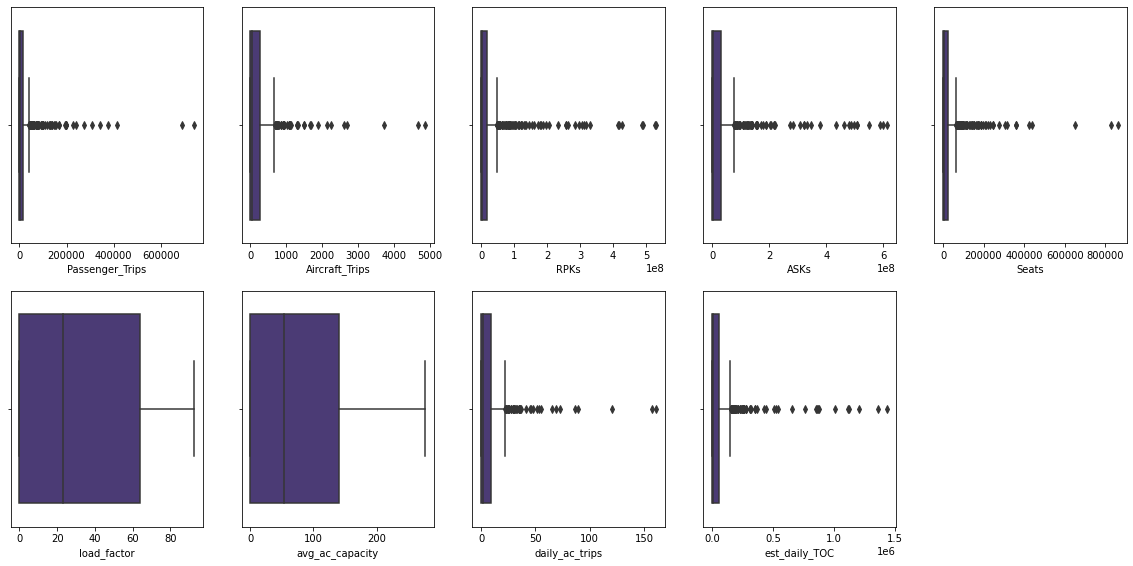

In [106]:
df_describe = df_20.drop(columns = ['City1', 'City2','Month','Distance_GC_(km)','Year','Month_num','city_pair'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

#### After

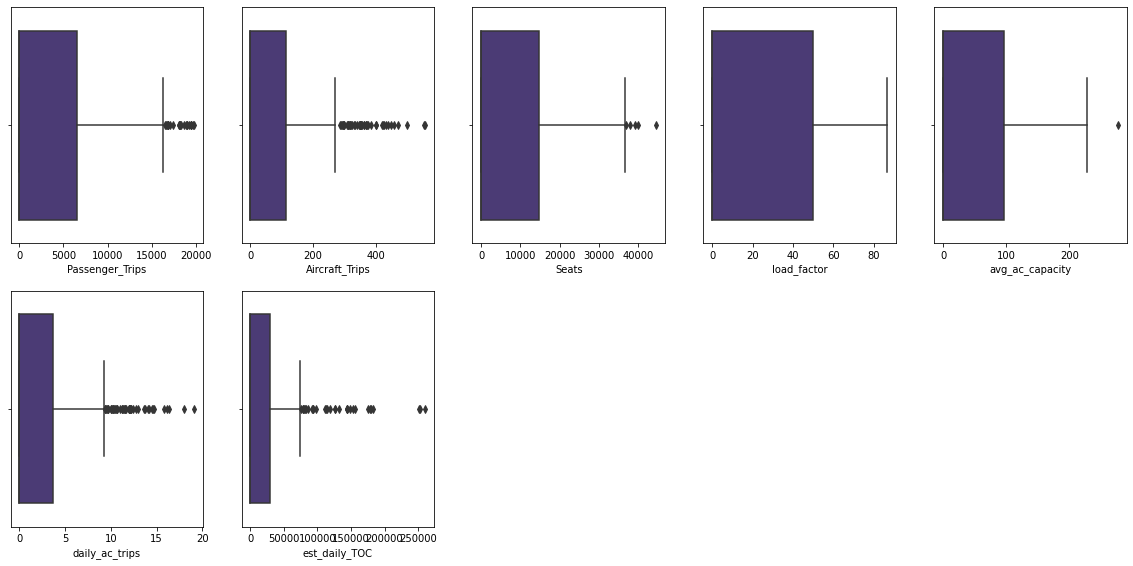

In [107]:
df_describe = df_20_new.drop(columns = ['City1', 'City2','Month','Distance_GC_(km)','RPKs','ASKs', 'Year','Month_num','city_pair'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

# Data Analysis

After we handling the data we have to analyze that we got
at first let we see traffic in 2020

In [72]:
df_20_new.head()

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,load_factor,city_pair,avg_ac_capacity,daily_ac_trips,est_daily_TOC
19158,ALBURY,SYDNEY,43922,314,41,452,141928.0,877784.0,1942,2020,4,16.17,ALBURYSYDNEY,47.0,1.37,5230.19
19159,ALBURY,SYDNEY,43952,416,33,452,188032.0,793712.0,1756,2020,5,23.69,ALBURYSYDNEY,53.0,1.06,4046.72
19160,ALBURY,SYDNEY,43983,0,0,452,0.0,0.0,0,2020,6,0.00,ALBURYSYDNEY,0.0,0.00,0.00
19161,ALBURY,SYDNEY,44013,0,0,452,0.0,0.0,0,2020,7,0.00,ALBURYSYDNEY,0.0,0.00,0.00
19162,ALBURY,SYDNEY,44044,0,0,452,0.0,0.0,0,2020,8,0.00,ALBURYSYDNEY,0.0,0.00,0.00


## Whats happening in Australia 2020 ?

In Australia, The Traffic Dropped when meets in beginning of April (Month 4), because in this situation, Australia decided to did the Lockdown to slowing the spread of the virus and to protect the Australian citizens in order to restore this hard situation.

But the trend is going up when starting in 4th Month till 7th Month and drop again in 8th Month

https://www.afr.com/politics/federal/australia-heads-for-lockdown-as-states-close-businesses-schools-20200322-p54cmi

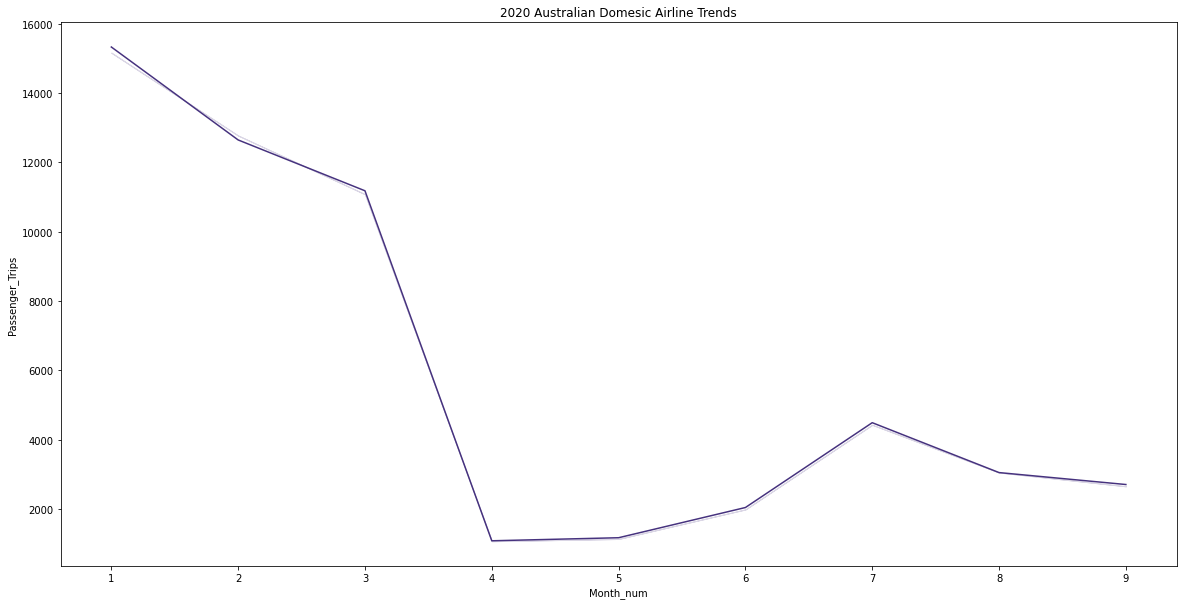

In [74]:
plt.figure(figsize = (20, 10))
plt.title('2020 Australian Domesic Airline Trends')
sns.set_palette("viridis")
ax = sns.lineplot(x="Month_num", y="Passenger_Trips", data=df_20_new, ci=False)

## Total Trips of The aircraft

Total Trips of the Aircraft also drops in 4th until 6th Month of 2020  and become stagnant in next month

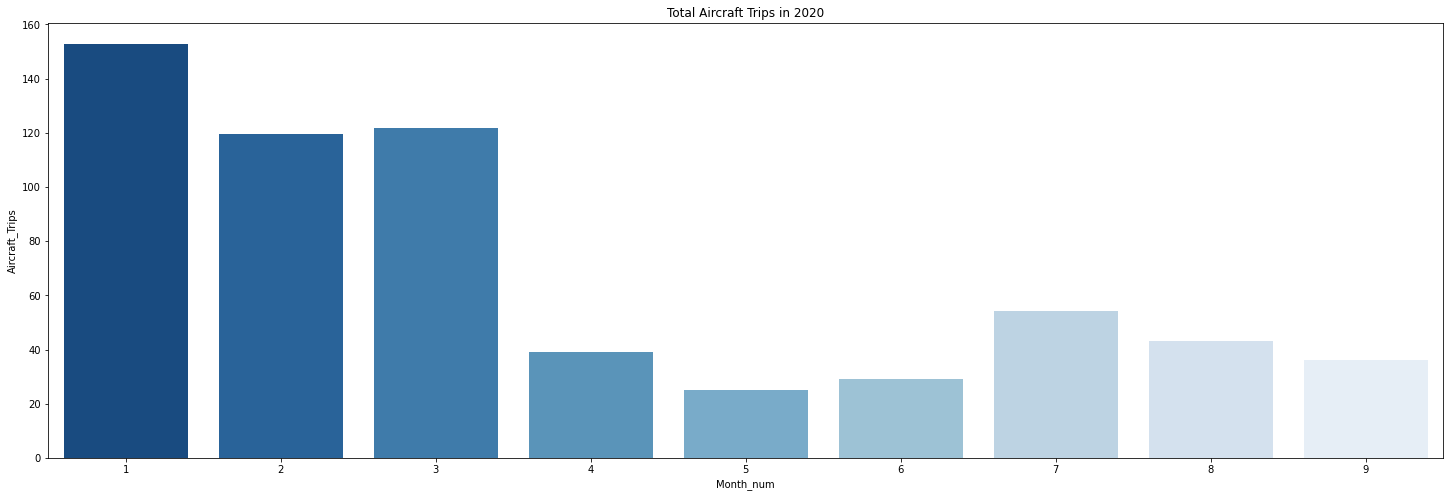

In [75]:
plt.figure(figsize = (25, 8))
plt.title('Total Aircraft Trips in 2020')
ax = sns.barplot(x="Month_num", y="Aircraft_Trips",palette = 'Blues_r',data=df_20_new, ci=False)

## Load Factor

Load Factor drop because of lockdown decision from Australian Government

>Load Factor is the percentage of occupancy from the available seats provided by the airline per flight

Load factor have the important role to make a decision about determine the price of the ticket.

and the other airlines also have the decision to stop their operational to save their money as much as possible. but in the **Australia**, they still provide the flight around their region.

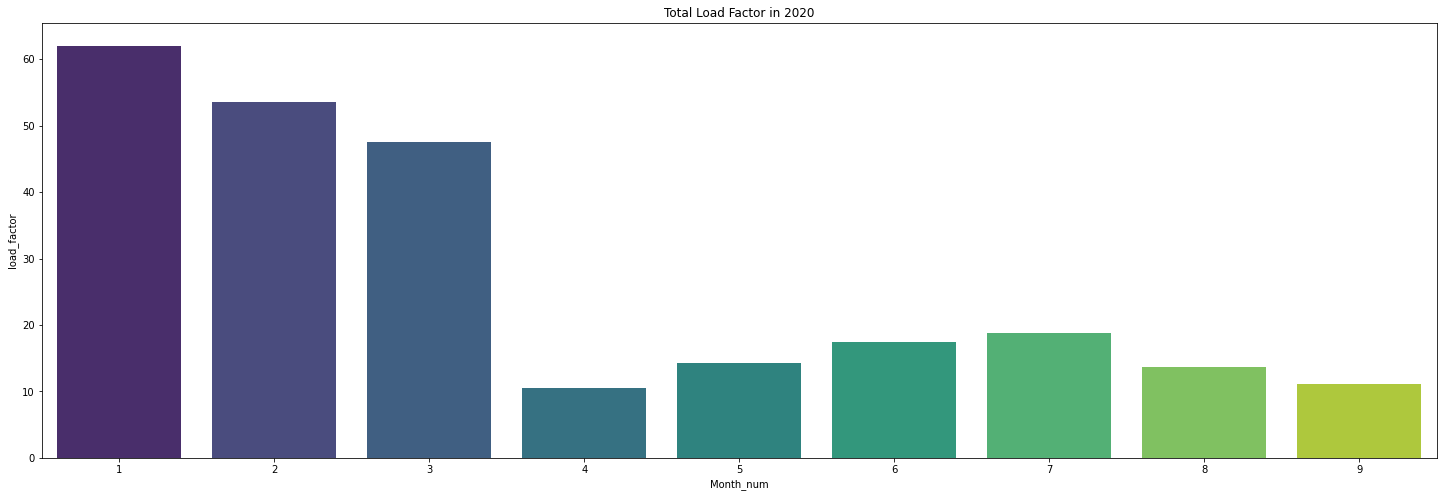

In [76]:
plt.figure(figsize = (25, 8))
plt.title('Total Load Factor in 2020')
ax = sns.barplot(x="Month_num", y="load_factor",palette='viridis',data=df_20_new, ci=False)

## Average Daily Available Seats per Flight & Aircraft trips

The impact of Lockdown makes the airline have to limit their the **available seat** and total flight per day for safety and financial reason. Also reduce customer interest to fly because the dangerous of this virus.

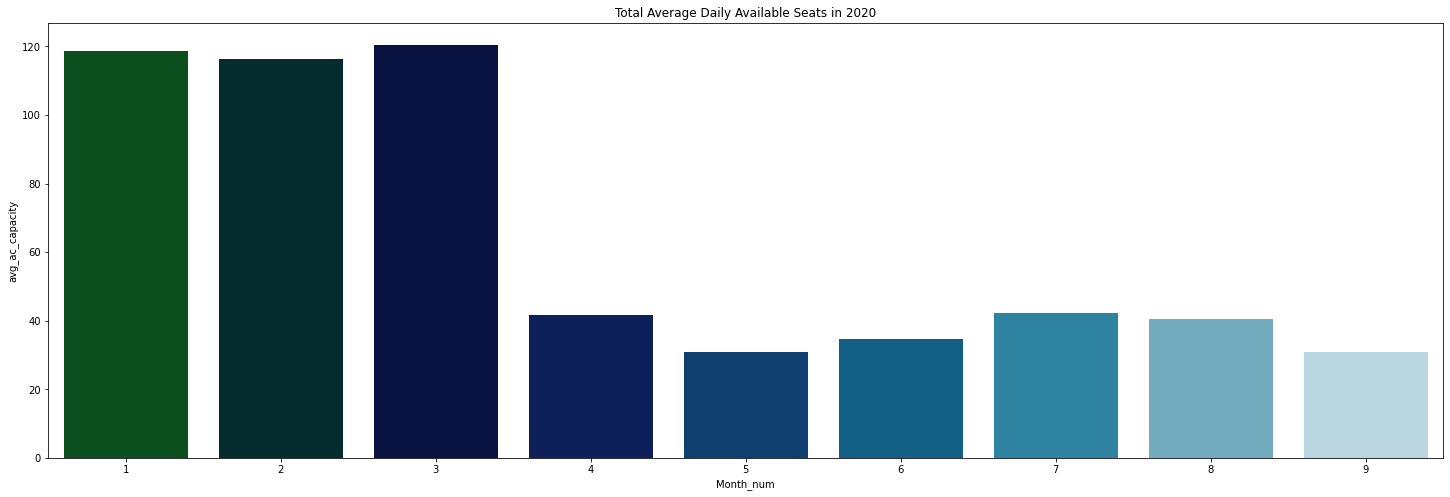

In [77]:
plt.figure(figsize = (25, 8))
plt.title('Total Average Daily Available Seats in 2020')
ax = sns.barplot(x="Month_num", y="avg_ac_capacity",palette='ocean',data=df_20_new, ci=False)

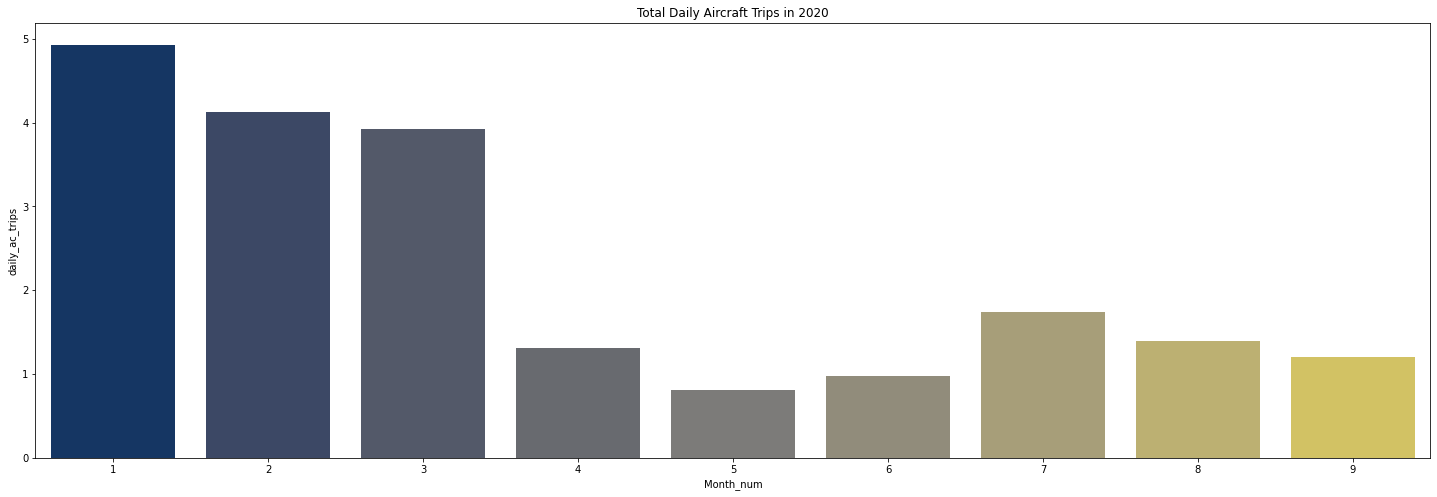

In [78]:
plt.figure(figsize = (25, 8))
plt.title('Total Daily Aircraft Trips in 2020')
ax = sns.barplot(x="Month_num", y="daily_ac_trips",palette='cividis',data=df_20_new, ci=False)

## Most Frequent of Destination based on Aircraft Trips

**ROCKHAMTON** is the most frequent of destination based on Aircraft Trips, we could get the Insight that

>From this top 10 city in Australia :
canberra,adelaide,brisbane,darwin,gold coast,Hobart,Cairn,Perth,Melborne,Sydney

in 2020  only **CAIRN** still become **Top 10 the most frequent based on Aircraft Trips**.

but How about  the passenger? 

In [110]:
demand = ((df_20_new[['City2','Aircraft_Trips']].groupby(['City2']).mean())).round(2).sort_values(by='Aircraft_Trips', ascending=False)
demand

,Aircraft_Trips
City2,
ROCKHAMPTON,216.83
PORT LINCOLN,189.33
MACKAY,158.67
GLADSTONE,153.44
CAIRNS,149.00
WAGGA WAGGA,131.89
MILDURA,125.89
PORT HEDLAND,120.00
EMERALD,116.22


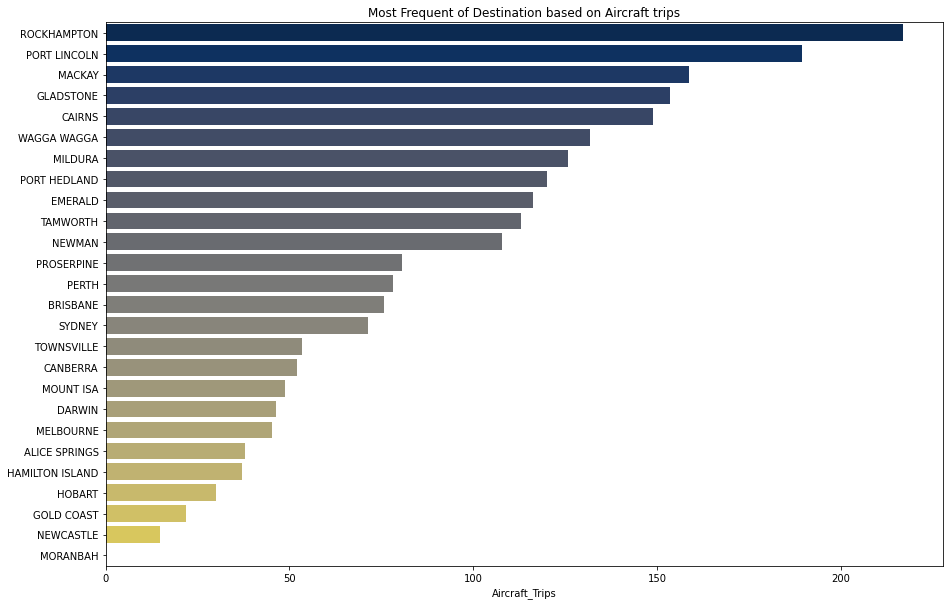

In [111]:
plt.figure(figsize = (15,10))
plt.title('Most Frequent of Destination based on Aircraft trips')
ax = sns.barplot(x="Aircraft_Trips", y=demand.index.values,palette='cividis',data=demand, ci=False)

In [112]:
pax = ((df_20_new[['City2','Passenger_Trips']].groupby(['City2']).mean())).round(2).sort_values(by='Passenger_Trips', ascending=False)
pax

,Passenger_Trips
City2,
ROCKHAMPTON,10996.67
PROSERPINE,9655.75
PORT HEDLAND,9152.33
CAIRNS,9012.33
MACKAY,8627.67
NEWMAN,7693.71
GLADSTONE,6140.89
MILDURA,5351.78
EMERALD,4931.56


## Most Frequent of Destination based on Average of Passengers

Again, **ROCKHAMTON** still the Most Frequent Destination based on Average Passeger in **2020**
and the top 10 City in Australia : **PERTH** enter in Top 10 Most Frequent Destination on Avg Passenger

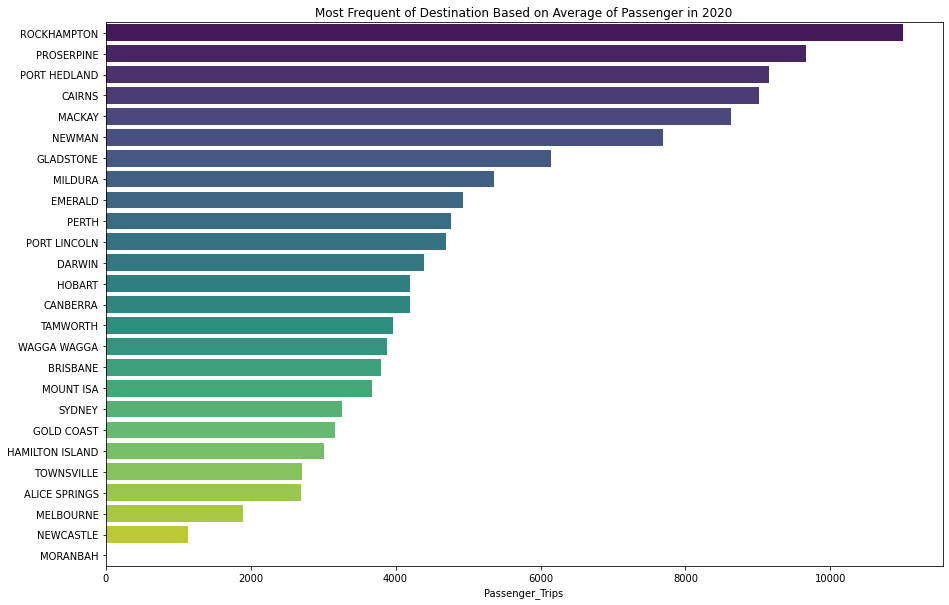

In [113]:
plt.figure(figsize = (15,10))
plt.title('Most Frequent of Destination Based on Average of Passenger in 2020')
ax = sns.barplot(x="Passenger_Trips", y=pax.index.values,palette='viridis',data=pax, ci=False)

## Highest Load Factor Destination in 2020 

>**MACKAY** becomes the highest **load factor** Destination in 2020 its just **62.44** on the average. This pandemic beat so hard to Airline Industry

But to many load factor below **50** which mean that the custumers interest reduced since the 3rd Month , Australian Government decide to Lockdown their country, and restrict the flight to reduce spread of virus.

In [115]:
load = ((df_20_new[['City2','load_factor']].groupby(['City2']).mean())).round(2).sort_values(by='load_factor', ascending=False)
load

,load_factor
City2,
CAIRNS,62.44
MACKAY,58.84
PROSERPINE,53.13
ROCKHAMPTON,52.86
PORT HEDLAND,52.59
NEWMAN,49.07
MILDURA,33.20
PORT LINCOLN,31.21
GLADSTONE,31.02


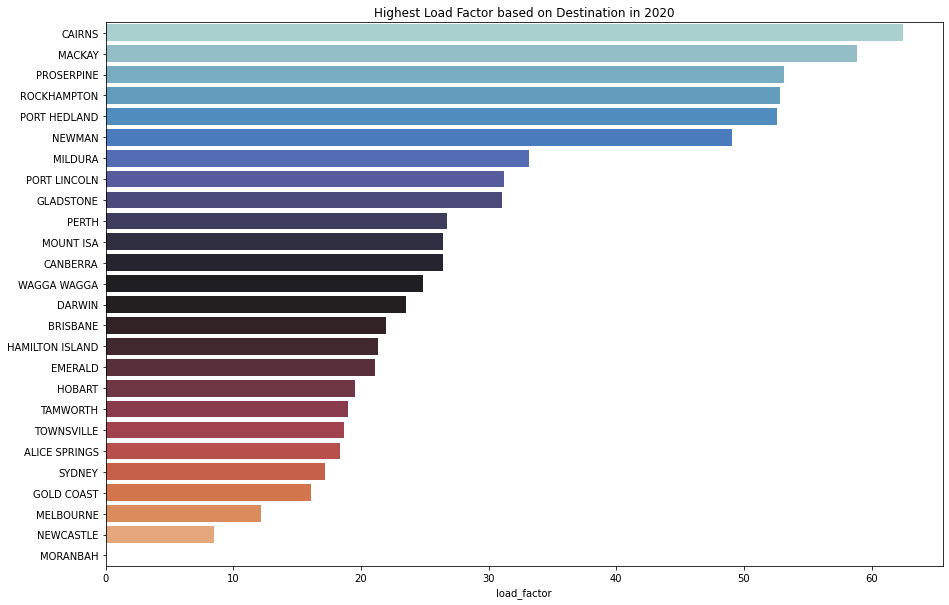

In [116]:
plt.figure(figsize = (15,10))
plt.title('Highest Load Factor based on Destination in 2020')
ax = sns.barplot(x="load_factor", y=load.index.values,palette='icefire',data=load, ci=False)

## Destination with The Most Expensive Total Operating Cost 

**Total Operating Cost** is key of airline industry, they trying hard to reduce as low as possible to increase the Revenue, and TOC also become the standrad to determine the **Tiket Price**

so we could predict the est_daily_TOC based on how many average trips the aircraft could fly each day.

**Melbourne**,**Chairn** and **Sydney** (Top 10 City in Australia) including the **the Most Exprensive TOC**, but if we see above this destination have a low **Load Factor**.

In [120]:
toc = ((df_20_new[['City2','est_daily_TOC']].groupby(['City2']).mean())).round(2).sort_values(by='est_daily_TOC', ascending=False)
toc

,est_daily_TOC
City2,
PERTH,49113.19
CAIRNS,45361.69
MACKAY,32225.86
PORT HEDLAND,32219.02
ROCKHAMPTON,25400.42
NEWMAN,23497.44
DARWIN,23230.63
MELBOURNE,19499.27
EMERALD,18508.59


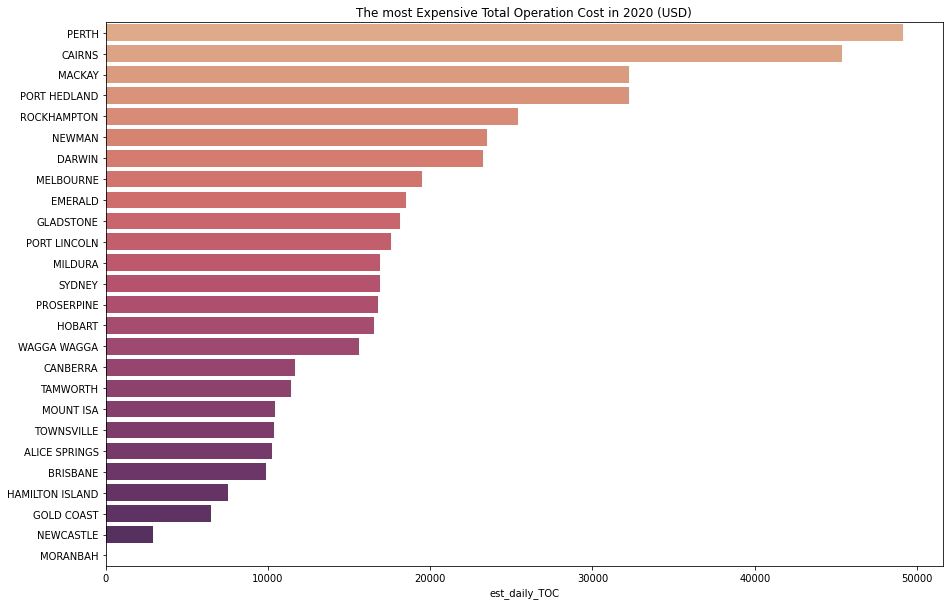

In [121]:
plt.figure(figsize = (15,10))
plt.title('The most Expensive Total Operation Cost in 2020 (USD)')
ax = sns.barplot(x="est_daily_TOC", y=toc.index.values,palette='flare',data=toc, ci=False)

### Available Seats Kilometers

This Feature could be the standard of the Airline to predict the Total Opating Cost.

based on ASKs Porthedland becoming the most expensive TOC Destination.

In [122]:
asks = ((df_20_new[['City2','ASKs']].groupby(['City2']).mean())).round(2).sort_values(by='ASKs', ascending=False)
asks

,ASKs
City2,
PORT HEDLAND,22630688.00
PERTH,19617336.24
CAIRNS,18201698.67
DARWIN,17521587.88
NEWMAN,16266297.00
PROSERPINE,12101742.50
MACKAY,11334668.33
ROCKHAMPTON,10140195.33
HOBART,9575133.75


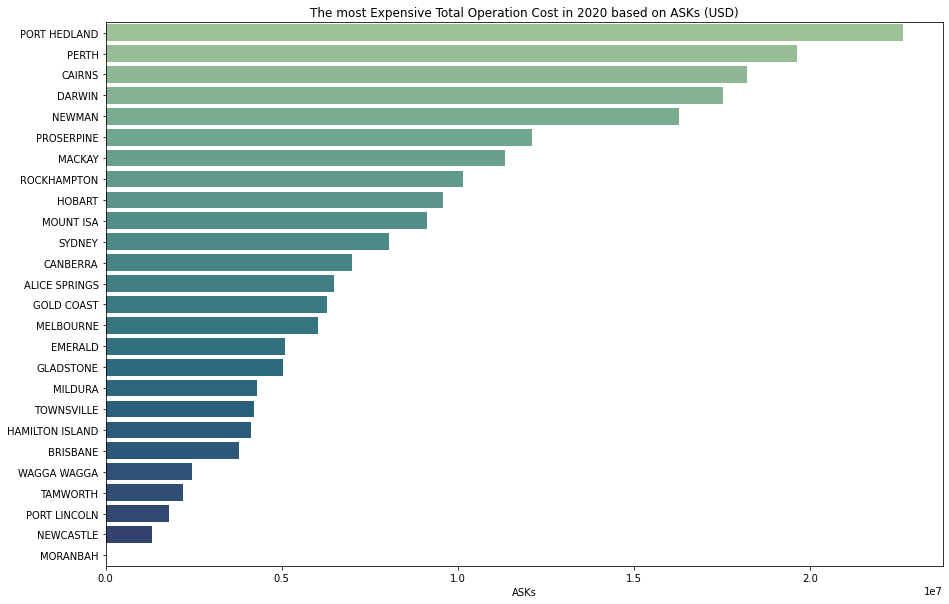

In [123]:
plt.figure(figsize = (15,10))
plt.title('The most Expensive Total Operation Cost in 2020 based on ASKs (USD)')
ax = sns.barplot(x="ASKs", y=asks.index.values,palette='crest',data=asks, ci=False)